# **MILESTONE 1**

Name : Muhammad Fawwaz Dynoeputra Isnandar

Batch : HCK - 002

## **OBJECTIVES**
- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

# **WORKING AREA**

## **IMPORTING LIBRARIES**

In order to work on our Milestone 2 project, we needed libraries in order for us to fulfill this project. Here are the libraries we used :

In [2]:
#Importing Pandas and Numpy Library
import pandas as pd
import numpy as np
#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Importing our Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
#Importing our Train and Test split
from sklearn.model_selection import train_test_split
#For removing outliers
from feature_engine.outliers import Winsorizer
#For preprocessing purposes 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#For finding our categorical features
import scipy.stats as stats
from sklearn.feature_selection import chi2
#For handling imbalanced data
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipe
#For evaluation purposes
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report,roc_curve,roc_auc_score
#For deployment purposes
import pickle
#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')
#Setting this notebook to show all data
pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
# For showing our time
import time
#Displaying diagram in our dataframe
from sklearn import set_config
set_config(display='diagram')
#Setting random seed so our trained data result stays consistent
np.random.seed(50)
tf.random.set_seed(50)


## **DATA LOADING**

### **ABOUT THE DATASET**

- [LINK DATASET](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/download?datasetVersionNumber=1)

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.
|      `COLUMN`      | DESCRIPTION                                                                                                       |
| :----------------: | :---------------------------------------------------------------------------------------------------------------- |
|    `customerID`    | ID Customer                                                                                                       |
|      `gender`      | Whether the customer is a male or a female                                                                        |
|  `SeniorCitizen`   | Whether the customer is a senior citizen or not (1, 0)                                                            |
|     `Partner`      | Whether the customer has a partner or not (Yes, No)                                                               |
|    `Dependents`    | Whether the customer has dependents or not (Yes, No)                                                              |
|      `tenure`      | Number of months the customer has stayed with the company                                                         |
|   `PhoneService`   | Whether the customer has a phone service or not (Yes, No)                                                         |
|  `MultipleLines`   | Whether the customer has multiple lines or not (Yes, No, No phone service)                                        |
| `InternetService`  | Customer’s internet service provider (DSL, Fiber optic, No)                                                       |
|  `OnlineSecurity`  | Whether the customer has online security or not (Yes, No, No internet service)                                    |
|   `OnlineBackup`   | Whether the customer has online backup or not (Yes, No, No internet service)                                      |
| `DeviceProtection` | Whether the customer has device protection or not (Yes, No, No internet service)                                  |
|   `TechSupport`    | Whether the customer has tech support or not (Yes, No, No internet service)                                       |
|   `StreamingTV`    | Whether the customer has streaming TV or not (Yes, No, No internet service)                                       |
| `StreamingMovies`  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                   |
|     `Contract`     | The contract term of the customer (Month-to-month, One year, Two year)                                            |
| `PaperlessBilling` | Whether the customer has paperless billing or not (Yes, No)                                                       |
|  `PaymentMethod`   | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card(automatic)) |
|  `MonthlyCharges`  | The amount charged to the customer monthly                                                                        |
|   `TotalCharges`   | The total amount charged to the customer                                                                          |
|      `Churn`       | Whether the customer churned or not (Yes or No)                                                                   |

Now we know what our dataset in this project is about. We want to import our dataset into this notebook and assigning a variable to it:

In [ ]:
df = pd.read_csv('/Users/zow/Documents/HACKTIV8/Learning_journal/Phase 2/MILESTONE/MILESTONE 1/test.csv')

Now it's time for us to explore our data in the next section.

## **EXPLORATORY DATA ANALYSIS**

> In this section we want to explore our data further in order to understand our data and make assumptions of what to do with our data next.

Next, we are going to take a glimpse at the 5 first and last rows of data from our dataframe:

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 21)

Our dataset contains **7043 rows** of data and **21 different columns**.

Let's see our whole data clearer :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features). The `Churn` column is our target.

Let's see the gender distribution within this dataset:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


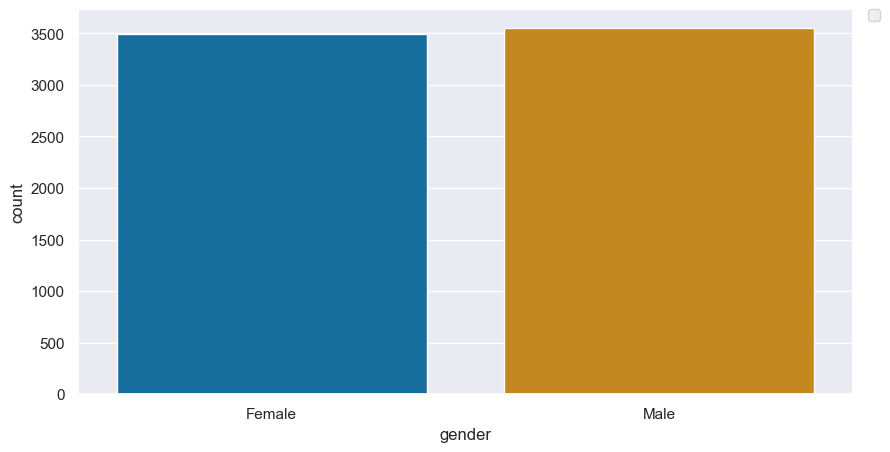

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data = df, x = 'gender', palette = 'colorblind')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Here, the gender distribution of `'females'` and `'males'` are proportionally equivalent, with a slightly higher count on the males. 

For now we want to explore our **categorical data's** and see the distribution within each features:

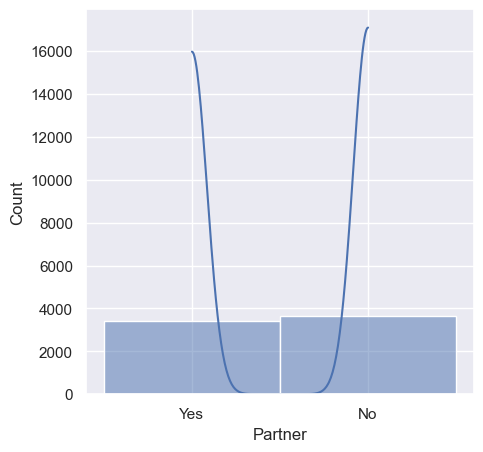

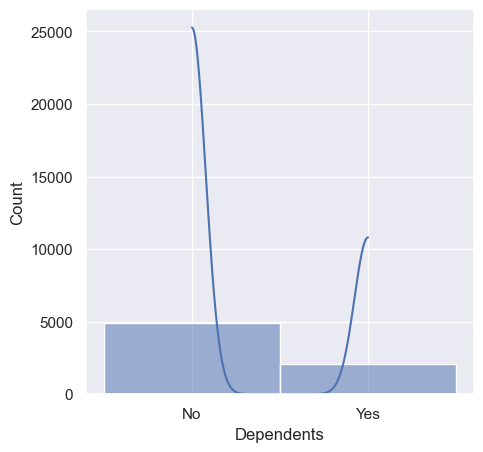

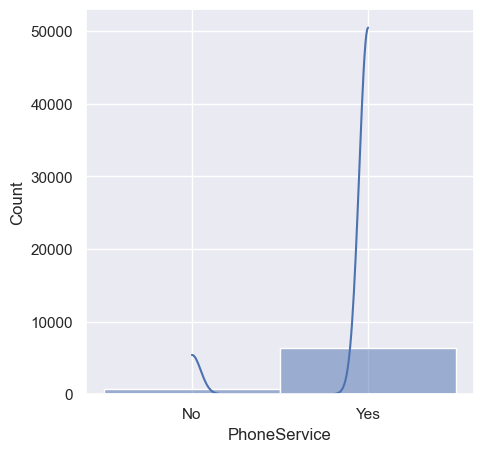

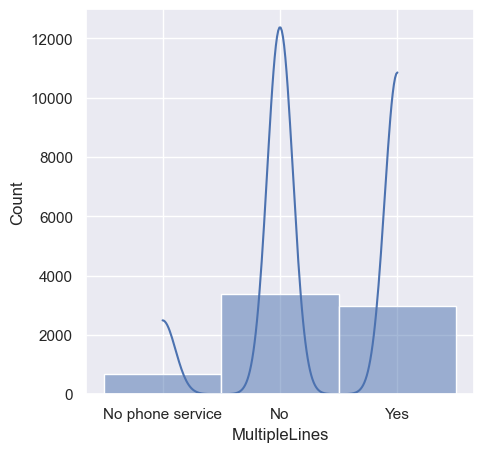

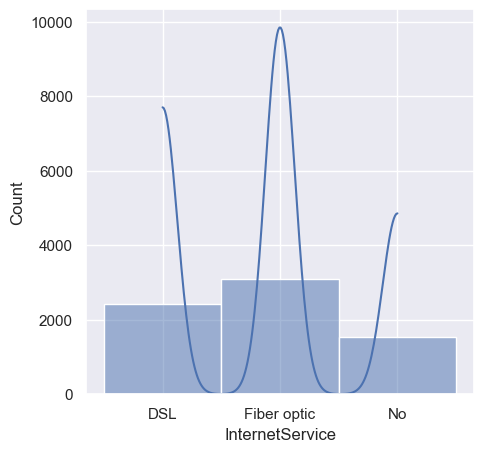

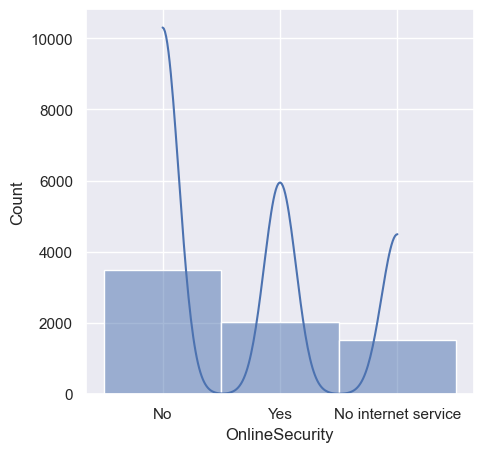

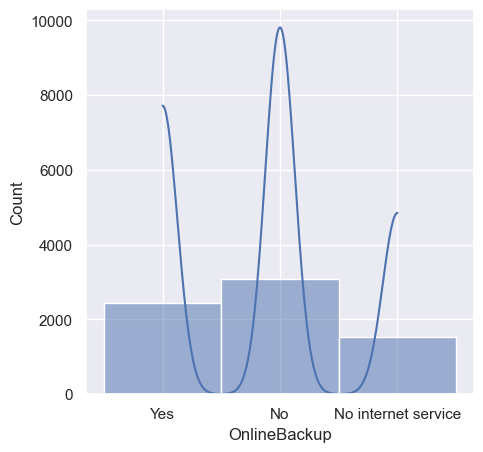

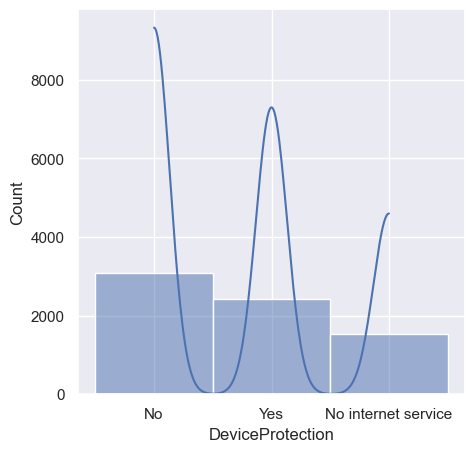

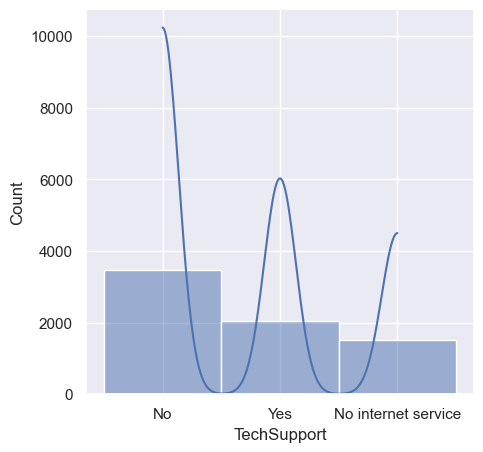

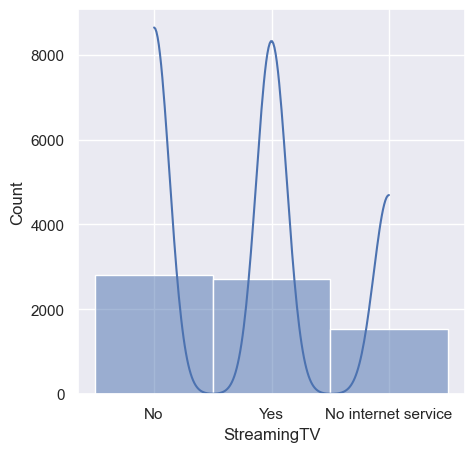

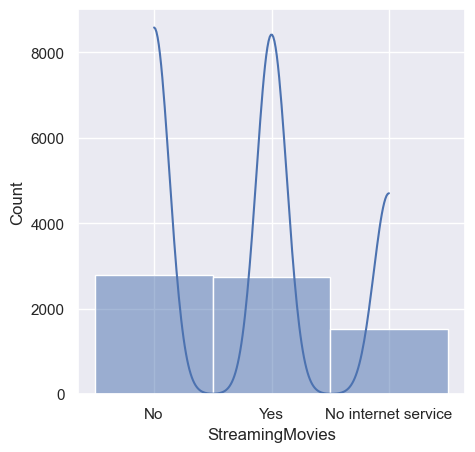

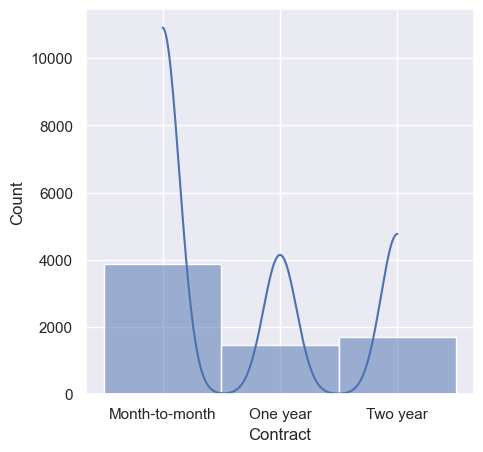

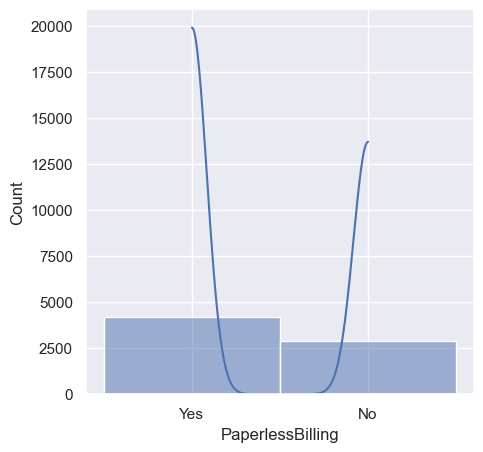

In [ ]:
cols = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling']
for i in cols:
  fig, axs = plt.subplots(figsize=(5,5))
  sns.histplot(df[i], kde = True);

Here's our insights from our visualization above :
- `Partner`, `Dependents` and `PhoneService` are binary categorical features, with only a yes or no answer.
- `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` and `Contract` has 3 different input values within each features (**Yes**, **No** or **No Service**)

Then we want to group our numerical data's and see the distribution in each data's

In [ ]:
#select integer columns from the dataframe------------------
df.select_dtypes('int64') 
#convert into list----------------
columns = list(df.select_dtypes('int64'))
#prints a list of all integer columns--------
columns 

['SeniorCitizen', 'tenure']

Here below is we want to visualize our numerical features :

<Figure size 1000x500 with 0 Axes>

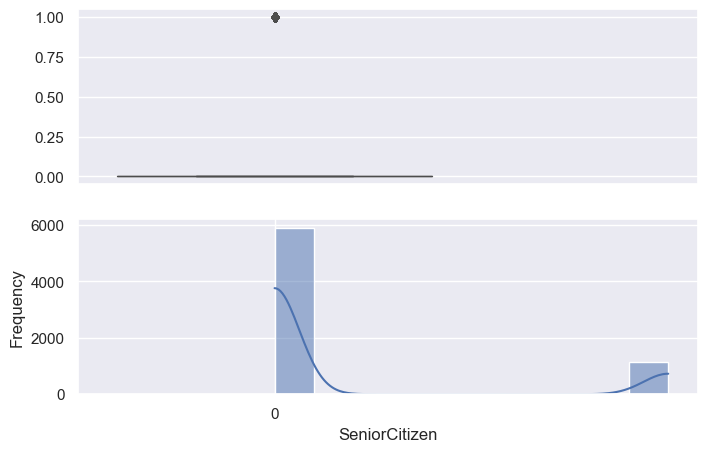

<Figure size 800x500 with 0 Axes>

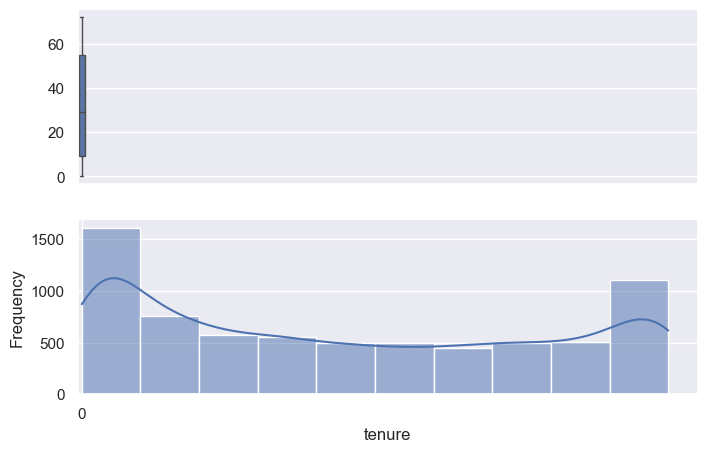

In [ ]:
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

- Turns out that the `SeniorCitizen` is a categorical data with only **0** and **1** inputs. This features is about whether the customer is a senior citizen or not, but we have no clue what age classifies as an `Senior Citizen`.
- The `tenure` feature states how many months does the customers stays with the company. And is also an **categorical data**, if you see in our code below is the unique values in months of customers staying subscribed within the company: 

In [ ]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

Since we have a high cardinality in this column, we will do some manipulation in order to reduce our cardinality so our model could work effectively.

<AxesSubplot:ylabel='Frequency'>

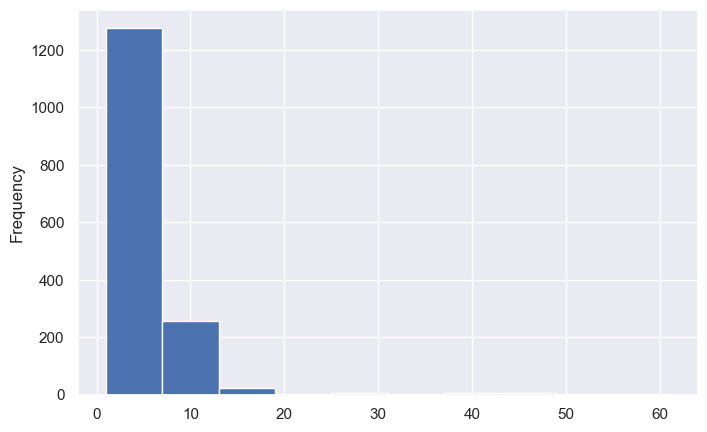

In [ ]:
df['MonthlyCharges'].value_counts().sort_index().plot.hist()

In [ ]:
df['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Here we don't see any importance in keeping the customer id as it is only a unique identifier of each customers. We'll remove this column later into our data cleaning section. In the next section we want to see our `TotalCharges` column: 

<AxesSubplot:ylabel='Frequency'>

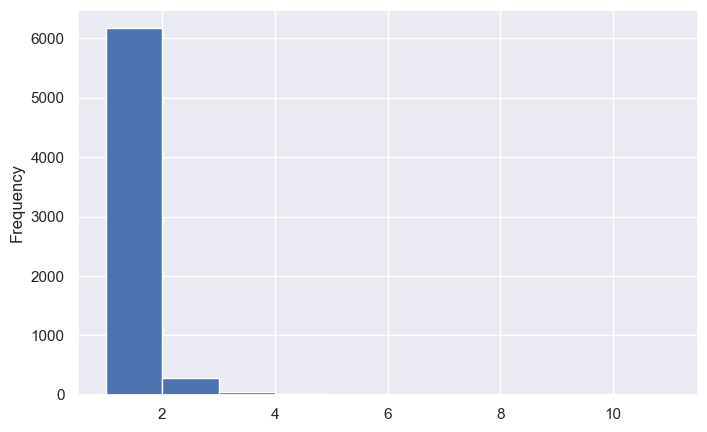

In [ ]:
df['TotalCharges'].value_counts().sort_index().plot.hist()

Now we want to see our label which is `Churn`. Churn in this context means is a measure of the number of individuals or items moving out of a collective group over a specific period, here is the visualization below :

<AxesSubplot:>

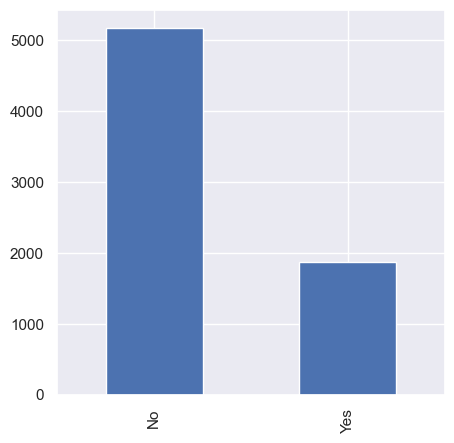

In [ ]:
plt.subplots(figsize=(5,5))
df['Churn'].value_counts().plot(kind='bar')

Here we see there's an **imbalance proportions** on our label data. This is not good for our model as it has a greater tendency to predict a class than the other. We'll handle this later into the journey of this project.

## **DATA CLEANING**

> In this section we want to perform some cleaning and manipulation in our data so our data could be handled accordingly in the next sections.

### **DATA MANIPULATION**

#### `Churn` column Encoding

Here we want to encode the label target which is `Churn`

In [ ]:
churn_cat = ['No','Yes']
churn_enc = OrdinalEncoder(categories=[churn_cat])
churn = pd.DataFrame(churn_enc.fit_transform(df[['Churn']]))
churn.columns = ['Churn']

In [ ]:
df = df.drop('Churn',axis=1)

In [ ]:
df = pd.concat([df.reset_index(drop=True),churn],axis = 1)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


#### `customerID` column removal

Earlier in our data exploration we could see that we want to eliminate the `'customerID'` since it only represents an customer unique identifier. Hence we chose to remove the whole columns in our code below:

In [ ]:
df = df.drop('customerID', axis =1)

In [ ]:
df.shape

(7043, 20)

Here we can see that our columns is removed.

#### `Tenure` column manipulation

In our exploration before, we saw that we have a high cardinality within our data. So we want to do some manipulation in order to reduce the cardinality of our `tenure` feature:

In [ ]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [ ]:
df['tenure'] = df['tenure'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], 24)
df['tenure'] = df['tenure'].replace([25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48], 48)
df['tenure'] = df['tenure'].replace([49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73], 73)

In [ ]:
df.tenure.value_counts()

24    3210
73    2239
48    1594
Name: tenure, dtype: int64

#### `TotalCharges` Data type changing

Here we want to change the datatype of the total charges into an integer:

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors="coerce")

In [ ]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Here we see there is still a missing value, so what we want to do is we want to drop those missing values in our lines of code below:

In [ ]:
df['TotalCharges'].isnull().sum()

11

In [ ]:
df.dropna(inplace=True, axis = 0)

In [ ]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### **DATA CLEANING**

Now we want to clean our data, first we want to check if there are any null values:

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Our dataset is clean from missing values. It's time to check for other common missing values:

In [ ]:
#checking other common missing values
miss_vals = {}

for i in list(df.columns):
    miss_vals[i] = 0
    for j in df[i]:
        if j in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss_vals[i] = miss_vals[i] + 1
miss_vals

{'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 0,
 'Churn': 0}

Looks like theres no other common missing values. Next we want to check on our duplicate data's:

In [ ]:
#check data duplicates
duplicates = df[df.duplicated()]
duplicates

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,24,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,1.0
1338,Male,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1.0
1491,Female,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,0.0
1739,Male,0,No,No,24,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,1.0
1932,Male,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,0.0
2713,Male,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,0.0
2892,Male,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,0.0
3301,Female,1,No,No,24,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,1.0
3754,Male,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,0.0
4098,Male,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,1.0


Here we saw no duplicates. Now off we go to the next section.

In [ ]:
df = df.drop(duplicates.index,axis = 0)

In [ ]:
df.duplicated().any()

False

In [ ]:
df.shape

(7010, 20)

## **DATA SPLITTING**

Next, we want to split the data into `Train` and `Test` so we could make sure we have made a reliable model. Before splitting we want to take some samples from our data so we could test our finished model in the end of this project:

In [ ]:
inference = df.sample(5)
inference

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6583,Female,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.25,412.55,0.0
5186,Female,1,No,No,24,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,36.45,36.45,1.0
1825,Female,0,No,No,48,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,54.20,1739.60,0.0
4064,Female,0,No,No,24,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,50.15,50.15,0.0
6144,Male,1,Yes,No,24,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.00,2024.10,0.0


We are going to save this sample value into `'inference'` variable for us to use later. Then we are going to remove the inferenced data from our dataframe so it doesn't intervene when we're doing the data inference later in this section.

In [ ]:
df = df.drop(inference.index, axis=0)

Next, we are going to define our features and target into X and y train and test, and adding our target into the y variable.

In [ ]:
X = df.drop('Churn',axis=1)
y = df['Churn']

x_train_full, x_test,  y_train_full, y_test = train_test_split(X,
                                                               y,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= y
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

Here on the parameters of the train test split, we want to use a test size of `20%`, meaning we have `80%` of train data

Then we checked our X and y train tests shape : 

In [ ]:
print(f'X_train_full shape : ',x_train_full.shape)
print(f'X_train shape : ',x_train.shape)
print(f'X_test shape : ',x_test.shape)
print(f'y_train_full shape : ',y_train_full.shape)
print(f'y_train shape : ',y_train.shape)
print(f'y_test shape : ',y_test.shape)
print(f'x_val shape : ',x_val.shape)
print(f'y_val shape : ',y_val.shape)

X_train_full shape :  (5604, 19)
X_train shape :  (4483, 19)
X_test shape :  (1401, 19)
y_train_full shape :  (5604,)
y_train shape :  (4483,)
y_test shape :  (1401,)
x_val shape :  (1121, 19)
y_val shape :  (1121,)


Off to our next exploration.

## **EDA ANALYSIS FOR FEATURE SELECTION**

> Now, in this section is we will explain further analysis of our data and select the features we think are important for our modelling.

In [ ]:
df_new = pd.concat([x_train, y_train], axis = 1)
df_new.shape

(4483, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7005 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7005 non-null   object 
 1   SeniorCitizen     7005 non-null   int64  
 2   Partner           7005 non-null   object 
 3   Dependents        7005 non-null   object 
 4   tenure            7005 non-null   int64  
 5   PhoneService      7005 non-null   object 
 6   MultipleLines     7005 non-null   object 
 7   InternetService   7005 non-null   object 
 8   OnlineSecurity    7005 non-null   object 
 9   OnlineBackup      7005 non-null   object 
 10  DeviceProtection  7005 non-null   object 
 11  TechSupport       7005 non-null   object 
 12  StreamingTV       7005 non-null   object 
 13  StreamingMovies   7005 non-null   object 
 14  Contract          7005 non-null   object 
 15  PaperlessBilling  7005 non-null   object 
 16  PaymentMethod     7005 non-null   object 


Then we want to split our **identified useful candidate features** into numerical and categorical data types :

In [ ]:
#splitting our data into categorical and numerical
category = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 
             'PaperlessBilling','PaymentMethod','Churn']
numerical = ['TotalCharges','MonthlyCharges']

#showing the splitting results
print(f'=='*20,'Categorical Features','=='*20)
print(category)
print('')
print(f'=='*20,'Numerical Features','=='*20)
print(numerical)

======================================== Categorical Features ========================================
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

======================================== Numerical Features ========================================
['TotalCharges', 'MonthlyCharges']


Here there are some important things to notice. We selected some categorical data to act as a numerical feature. the `odometer`, `yearOfRegistration` and `powerPS` was an categorical data in the first place, but for us to determine the price of the used car we must take these three features into account so we could then create a hopefully better model at predicting the used car price.

### **NUMERICAL FEATURES ANALYSIS**


> In this section we want to analyze the numerical features we splitted earlier. Follow along our journey in finding the features we needed for our model.

Let's see our descriptive values on our numerical column :

In [ ]:
df_new['TotalCharges'].describe().T

count    4483.000000
mean     2238.510975
std      2242.605661
min        18.850000
25%       415.325000
50%      1347.150000
75%      3625.225000
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
df_new['MonthlyCharges'].describe().T

count    4483.000000
mean       64.230984
std        30.024495
min        18.250000
25%        35.000000
50%        70.100000
75%        89.750000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
#Assigning numerical to a new variable
df_num = df_new[numerical]

Then we want to check our numerical data distribution:

In [ ]:
skew_val = df_new[numerical].skew()
skew_val.to_frame()

,0
TotalCharges,1.017395
MonthlyCharges,-0.190915


Then plotting our numerical data to see if there are any outliers

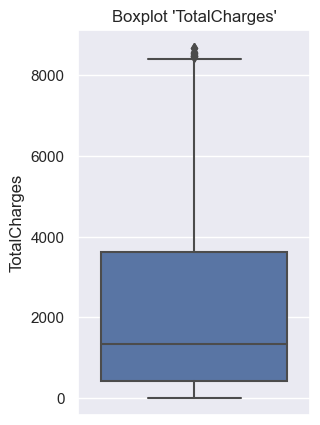

TotalCharges Skewness: 1.0173949451827766
Columns 'TotalCharges' right skewed


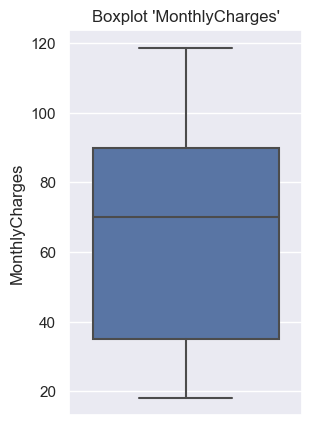

MonthlyCharges Skewness: -0.19091495606495573
Columns 'MonthlyCharges' normal distribution


In [ ]:
def plot_outlier(df_num, col):
    fig, ax = plt.subplots(figsize = (3, 5))
    
    sns.boxplot(y=df_num[col], ax =  ax)
    ax.set_title(f"Boxplot '{col}'")
    plt.show()
    
    print(df_num[col].name + ' Skewness: ' + str(df_num[col].skew()))
    if -0.5 <= df_num[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_num[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_num[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

for col in df_num.columns:
    plot_outlier(df_num, col)

Here we see a little skew in our total charges, hence we want to cap them using winsorizer with our code below:

In [ ]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['TotalCharges'])
df_num = wins.fit_transform(df_num)

Now that our outliers has been capped, we want to see the changes by making a visualization on the handled features:

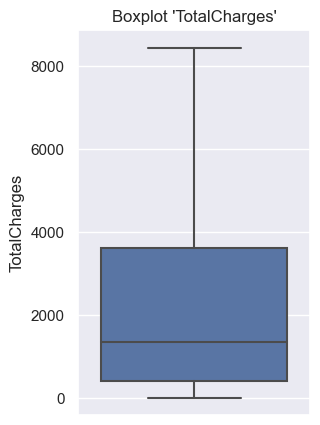

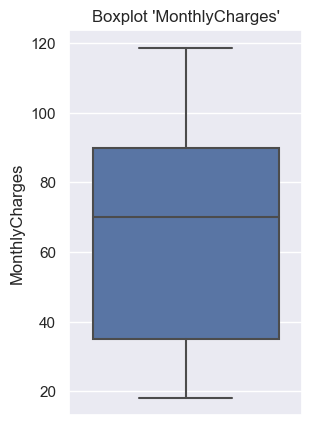

In [ ]:
def plot_outlier(df_num, col):
    fig, ax = plt.subplots(figsize = (3, 5))
    
    sns.boxplot(y=df_num[col], ax =  ax)
    ax.set_title(f"Boxplot '{col}'")
    plt.show()

for col in df_num.columns:
    plot_outlier(df_num, col)

Now our data has been clean of outliers, it's time to find correlation with our target label for this project, which is `price`:

<AxesSubplot:>

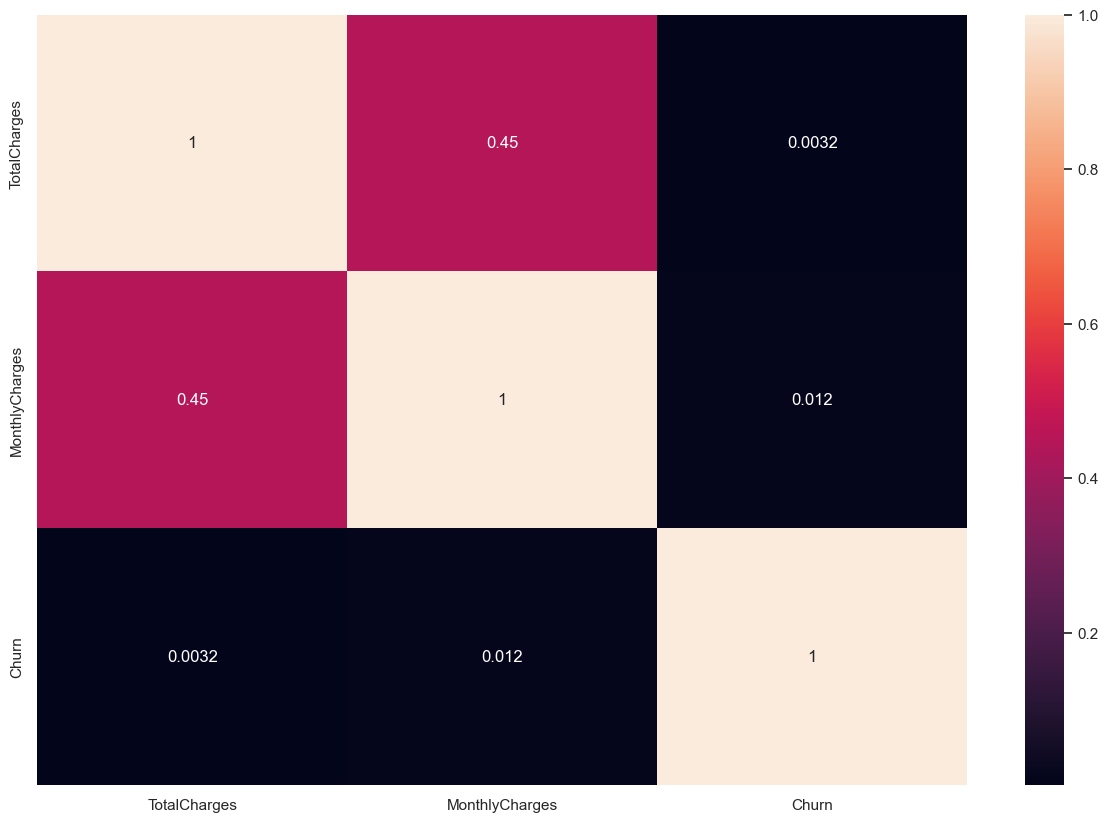

In [ ]:
# numerical features correlation matrix
num_corr = pd.concat([df_num.reset_index(drop=True), df['Churn']],axis = 1)
plt.figure(figsize=(15,10))
sns.heatmap(num_corr.corr(method='kendall'),annot=True)

From our kendall correlation matrix we could conclude that we are going to only the `MonthlyCharges` feature in this numerical data type as our features for modelling. So here is the end result of our selected features on numerical data type:

In [ ]:
# dropping unnecessary features
df_cleaned = df_num.drop(['TotalCharges'],axis = 1)
df_cleaned.head()

,MonthlyCharges
2146,115.05
675,110.35
2036,74.30
4067,79.60
2337,104.75


The last thing we want to do is we want to scale our features:

In [ ]:
#Scaling Numerical Features
num_vals = ['MonthlyCharges']
scaler = StandardScaler()

scaled_num = pd.DataFrame(scaler.fit_transform(df_cleaned[num_vals]))
scaled_num.columns = num_vals

df_cleaned.drop(num_vals, axis = 1, inplace=True)
df_cleaned = pd.concat([df_cleaned.reset_index(drop=True),scaled_num], axis = 1)

df_cleaned.head()

,MonthlyCharges
0,1.692774
1,1.536218
2,0.335397
3,0.511940
4,1.349683


### **CATEGORICAL FEATURES ANALYSIS**


> Next is we want to analyze our categorical features. In our code below we assign our categorical data into a new dataframe variable:

In [ ]:
df_cat = df_new[category]
df_cat.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
2146,Female,0,No,No,73,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0.0
675,Male,1,No,No,73,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0.0
2036,Male,1,Yes,No,24,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,0.0
4067,Female,0,Yes,No,73,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0.0
2337,Female,1,No,No,73,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),1.0


And the next step we want to see the unique values of our categorical data types from our loop below:

In [ ]:
for i in df_cat:
    print(f'{i} : {df_cat[i].unique()}')
    print(f'')
    print(f'{i} total unique values : {df_cat[i].nunique()}')
    print('=='*20)

gender : ['Female' 'Male']

gender total unique values : 2
SeniorCitizen : [0 1]

SeniorCitizen total unique values : 2
Partner : ['No' 'Yes']

Partner total unique values : 2
Dependents : ['No' 'Yes']

Dependents total unique values : 2
tenure : [73 24 48]

tenure total unique values : 3
PhoneService : ['Yes' 'No']

PhoneService total unique values : 2
MultipleLines : ['Yes' 'No' 'No phone service']

MultipleLines total unique values : 3
InternetService : ['Fiber optic' 'DSL' 'No']

InternetService total unique values : 3
OnlineSecurity : ['Yes' 'No' 'No internet service']

OnlineSecurity total unique values : 3
OnlineBackup : ['Yes' 'No' 'No internet service']

OnlineBackup total unique values : 3
DeviceProtection : ['Yes' 'No' 'No internet service']

DeviceProtection total unique values : 3
TechSupport : ['Yes' 'No' 'No internet service']

TechSupport total unique values : 3
StreamingTV : ['Yes' 'No' 'No internet service']

StreamingTV total unique values : 3
StreamingMovies : ['Yes

We see no high cardinalities within our data, it's all good and the **tenure** feature we already did an feature engineering before. The next thing we want to do is we want to select our features using `chi square`:

In [ ]:
chi_list = ['gender','SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in chi_list:
    contingency_table = pd.crosstab(df_cat[col], df_cat['Churn'])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(col)
    print('p=%.3f' % (p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
    print('\n')

gender
p=0.371
Probably independent


SeniorCitizen
p=0.000
Probably dependent


Partner
p=0.000
Probably dependent


Dependents
p=0.000
Probably dependent


tenure
p=0.000
Probably dependent


PhoneService
p=0.707
Probably independent


MultipleLines
p=0.031
Probably dependent


InternetService
p=0.000
Probably dependent


OnlineSecurity
p=0.000
Probably dependent


OnlineBackup
p=0.000
Probably dependent


DeviceProtection
p=0.000
Probably dependent


TechSupport
p=0.000
Probably dependent


StreamingTV
p=0.000
Probably dependent


StreamingMovies
p=0.000
Probably dependent


Contract
p=0.000
Probably dependent


PaperlessBilling
p=0.000
Probably dependent


PaymentMethod
p=0.000
Probably dependent




From the chi square result above We'll use all the features **except** the `gender` and `PhoneService` because its independent when compared to our label.

In [ ]:
df_cat.drop(['gender','PhoneService'], axis = 1, inplace=True)

The next thing we want to do is we want to encode our categorical features. Here the majority of features are preferably better using the ordinal encoder, except the `PaymentMethod` and `Contract` that we use one hot encoder:

In [ ]:
#ordinal encoding
partner_ord = ['No', 'Yes']
dependents_ord = ['No', 'Yes']
tenure_ord = ['24', '48','73']
multplelines_ord = ['No phone service','No', 'Yes']
internetservice_ord = ['No', 'DSL', 'Fiber optic']
onlinesecurity_ord = ['No internet service','No', 'Yes']
onlinebackup_ord = ['No internet service','No', 'Yes']
deviceprotection_ord = ['No internet service','No', 'Yes']
techsupport_ord = ['No internet service','No', 'Yes']
streamingtv_ord = ['No internet service','No','Yes']
streamingmovies_ord = ['No internet service','No','Yes']
paperless_ord = ['No', 'Yes']


ord_enc = OrdinalEncoder(categories =[partner_ord, dependents_ord, tenure_ord, multplelines_ord, internetservice_ord, onlinesecurity_ord, onlinebackup_ord, deviceprotection_ord, techsupport_ord, streamingtv_ord, streamingmovies_ord, paperless_ord])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]))
cat_ord.columns = ['Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

Then as we explained before, we want to encode our `Contract` and `PaymentMethod` using one hot encoding:

In [ ]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['Contract', 'PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['Contract', 'PaymentMethod'])

cat_ohe.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0


The encoding results are shown below:

In [ ]:
# merging numerical and categorical features 
new_df = pd.concat([df_cleaned.reset_index(drop=True),cat_ord],axis =1)
new_df.head()

,MonthlyCharges,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,1.692774,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,1.536218,0.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0
2,0.335397,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.511940,1.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
4,1.349683,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0


## **PREPROCESSING**

> In this section we want to take a different approach for this project on handling our test data's as explained below.

In this preprocessing we want to create an automated process using `pipeline` from the library of sklearn. This is intended because we want to deploy this project later on into an website interface, let's start by making a pipeline for our numerical features:

### **NUMERICAL FEATURES PIPELINE**

As explained before, here we create a pipeline for our numerical features. Earlier in our feature selection we did some **outlier handling** and some scaling. So for this pipeline we want to mimic the same behaviours we did to our train data.

In [ ]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(pd.DataFrame(x_train[['MonthlyCharges']]))
num_tr

array([[ 1.69277401],
       [ 1.5362177 ],
       [ 0.33539746],
       ...,
       [ 0.56190447],
       [-1.45667268],
       [-1.46000367]])

As you can see above, we successfully transformed our train data using the pipeline. Now off to the next section which we want to make a pipeline for our categorical features.

### Categorical features pipeline

Now we want to mimic the same behaviours as we did with our categorical feature selection before which is only ordinally encoding them :

In [ ]:
senior_ord = ['0','1']
partner_ord = ['No', 'Yes']
dependents_ord = ['No', 'Yes']
tenure_ord = ['24', '48','73']
multplelines_ord = ['No phone service','No', 'Yes']
internetservice_ord = ['No', 'DSL', 'Fiber optic']
onlinesecurity_ord = ['No internet service','No', 'Yes']
onlinebackup_ord = ['No internet service','No', 'Yes']
deviceprotection_ord = ['No internet service','No', 'Yes']
techsupport_ord = ['No internet service','No', 'Yes']
streamingtv_ord = ['No internet service','No','Yes']
streamingmovies_ord = ['No internet service','No','Yes']
paperless_ord = ['No', 'Yes']

ord_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories =[senior_ord, partner_ord, dependents_ord, tenure_ord, multplelines_ord, internetservice_ord, onlinesecurity_ord, onlinebackup_ord, deviceprotection_ord, techsupport_ord, streamingtv_ord, streamingmovies_ord, paperless_ord]))
        
    ])

ord_tr = ord_pipeline.fit_transform(x_train[['SeniorCitizen','Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']])
ord_tr

array([[0., 0., 0., ..., 2., 2., 1.],
       [1., 0., 0., ..., 2., 2., 1.],
       [1., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

Now we have seen that we successfully transformed our categorical features, off to the next.

In [ ]:
ohe_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

ohe_tr = ohe_pipeline.fit_transform(x_train[['Contract', 'PaymentMethod']])
ohe_tr

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

#### **Full Pipeline**

This full pipeline is intended to merge our two pipelines into 1 whole automated process. So we want to use `ColumnTransformer` to start our merging journey:

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['MonthlyCharges']),
        ("ord_ord", ord_pipeline, ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']),
        ("ohe_ord", ohe_pipeline, ['Contract','PaymentMethod'])
    ])

train_tr = full_pipeline.fit_transform(x_train)
train_tr

array([[ 1.69277401,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.5362177 ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33539746,  1.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.56190447,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.45667268,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.46000367,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

Here you can see the preprocessed pipeline results :

In [ ]:
preprocess_columns = ['MonthlyCharges', 'SeniorCitizen','Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
preprocessed_pipeline = pd.DataFrame(train_tr, columns = preprocess_columns)
review_preprocess = pd.concat([preprocessed_pipeline, y_train.reset_index(drop=True)], axis=1)
review_preprocess.head()

,MonthlyCharges,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1.692774,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.536218,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.335397,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.511940,0.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.349683,1.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
review_preprocess.columns

Index(['MonthlyCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn'], dtype='object')

#### **Imbalanced Data Handling**

As we saw before, we saw an imbalanced proportions of data within our label, hence we want to undersample the **majority** class and oversample the `minority` class so our data is balanced:

In [ ]:
df_cat['Churn'].value_counts()

0.0    3287
1.0    1196
Name: Churn, dtype: int64

Here we used `SMOTENC` as our data has many categorical features in it. We also used the `RandomUnderSampler` for undersampling our majority class:

In [ ]:
sm = SMOTENC(random_state=42, sampling_strategy= 0.6, categorical_features=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
under = RandomUnderSampler(sampling_strategy = 1.0, random_state=42)

Then we initialized the pipeline from imblearn and merge our previous preprocessed pipeline so our data could be balanced:

In [ ]:
pipeline_final = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sample', sm),
            ('under_sample', under)
])

pipeline_final

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('ord_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['24',
                                                                                               '48',
                                                                                               '73'],
                                                                                              ['No '
                                                                                               'phone '
                                                                                               'service',
                                                                                               'No',...
                                                   'PaperlessBilling']),
                                                 ('ohe_ord',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Contract',
                                                   'PaymentMethod'])])),
                ('over_sample',
                 SMOTENC(categorical_features=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20],
                         random_state=42, sampling_strategy=0.6)),
                ('under_sample',
                 RandomUnderSampler(random_state=42, sampling_strategy=1.0))])

Now we want to fit and resample our train data's and assigning it into a new variable:

In [ ]:
x_resampled, y_resampled = pipeline_final.fit_resample(x_train, y_train)

In [ ]:
resampled = pd.concat([pd.DataFrame(x_resampled, columns=preprocess_columns), pd.DataFrame(y_resampled)], axis=1)
resampled

,MonthlyCharges,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.005630,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.479990,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.011587,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.315810,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.474993,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,-0.596375,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3940,-0.517373,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3941,0.199374,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3942,0.898899,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Tadaa! we successfully transformed our `x_train` data, let's see the proportions after balancing:

In [ ]:
resampled.Churn.value_counts()

0.0    1972
1.0    1972
Name: Churn, dtype: int64

#### **test** and **val** Preprocessing

Now we want to transform our test and validation data's:

In [ ]:
test_tr = full_pipeline.transform(x_test)
test_tr

array([[1.04656285, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.35205239, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09390102, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.83504527, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.71179881, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.668496  , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
val_tr = full_pipeline.transform(x_val)
val_tr

array([[ 0.36870732,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.35134801,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.4766586 ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.40464378,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.87002062,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.47030237,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Off to the next section!

## **TensorFlow Pipeline**

Here, we initialized a pipeline for our tensorflow, here we used the `buffer size` of `3944` as we have a total data entry on train data as much as `3944`. We also batched the data's as much as `64`:

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_resampled, y_resampled))
train_dataset = train_dataset.shuffle(buffer_size=3944).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(64)

2022-12-01 19:42:58.745125: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## **MODEL DEFINITION AND TRAINING**

> In this section we want to initiate 4 different models which consists of :
- 2 Sequential Models
- 2 Functional Models
For each models, we will use the first base model and then tune in search of optimizing our model. Then we'll choose the best model of the 4 to then be used as our chosen final model.

### **SEQUENTIAL MODEL DEFINITION**

##### BASE SEQUENTIAL MODEL

Here we want to find the optimum numbers of hidden layers with our code below:

In [ ]:
# defining neuron amount
alp = 10
inp = x_resampled.shape[1]
out = 1
hid = int(len(x_resampled)/(alp*(inp+out)))
print(f'Neuron count on hidden layer: {hid}')

Neuron count on hidden layer: 17


Here the optimum hidden layer is 17, now we want to initialize our sequential model:

In [ ]:
seq_base = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', kernel_initializer = 'HeNormal', input_shape=(inp,)),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])
seq_base.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
tf.keras.utils.plot_model(seq_base, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
seq_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 17)                374       
                                                                 
 dense_2 (Dense)             (None, 1)                 18        
                                                                 
Total params: 854
Trainable params: 854
Non-trainable params: 0
_________________________________________________________________


Here you can see in our summary that we have a total of 854 data to be trained

##### BASE MODEL TRAINING

Here we initialized our fit so our data could be trained. We used 50 iterations as our computational hardware isnt that good:

In [ ]:
history_1 = seq_base.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
62/62 [==============================] - 1s 5ms/step - loss: 0.6266 - accuracy: 0.6630 - val_loss: 0.5955 - val_accuracy: 0.7128
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7495 - val_loss: 0.5286 - val_accuracy: 0.7413
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7652 - val_loss: 0.5178 - val_accuracy: 0.7377
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7695 - val_loss: 0.5148 - val_accuracy: 0.7413
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7721 - val_loss: 0.5200 - val_accuracy: 0.7377
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7784 - val_loss: 0.4918 - val_accuracy: 0.7547
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.7809 - val_loss: 0.4945 - val_accuracy: 0.7493
Epoch 8/50
62/62 [==

Then we want to plot the results:

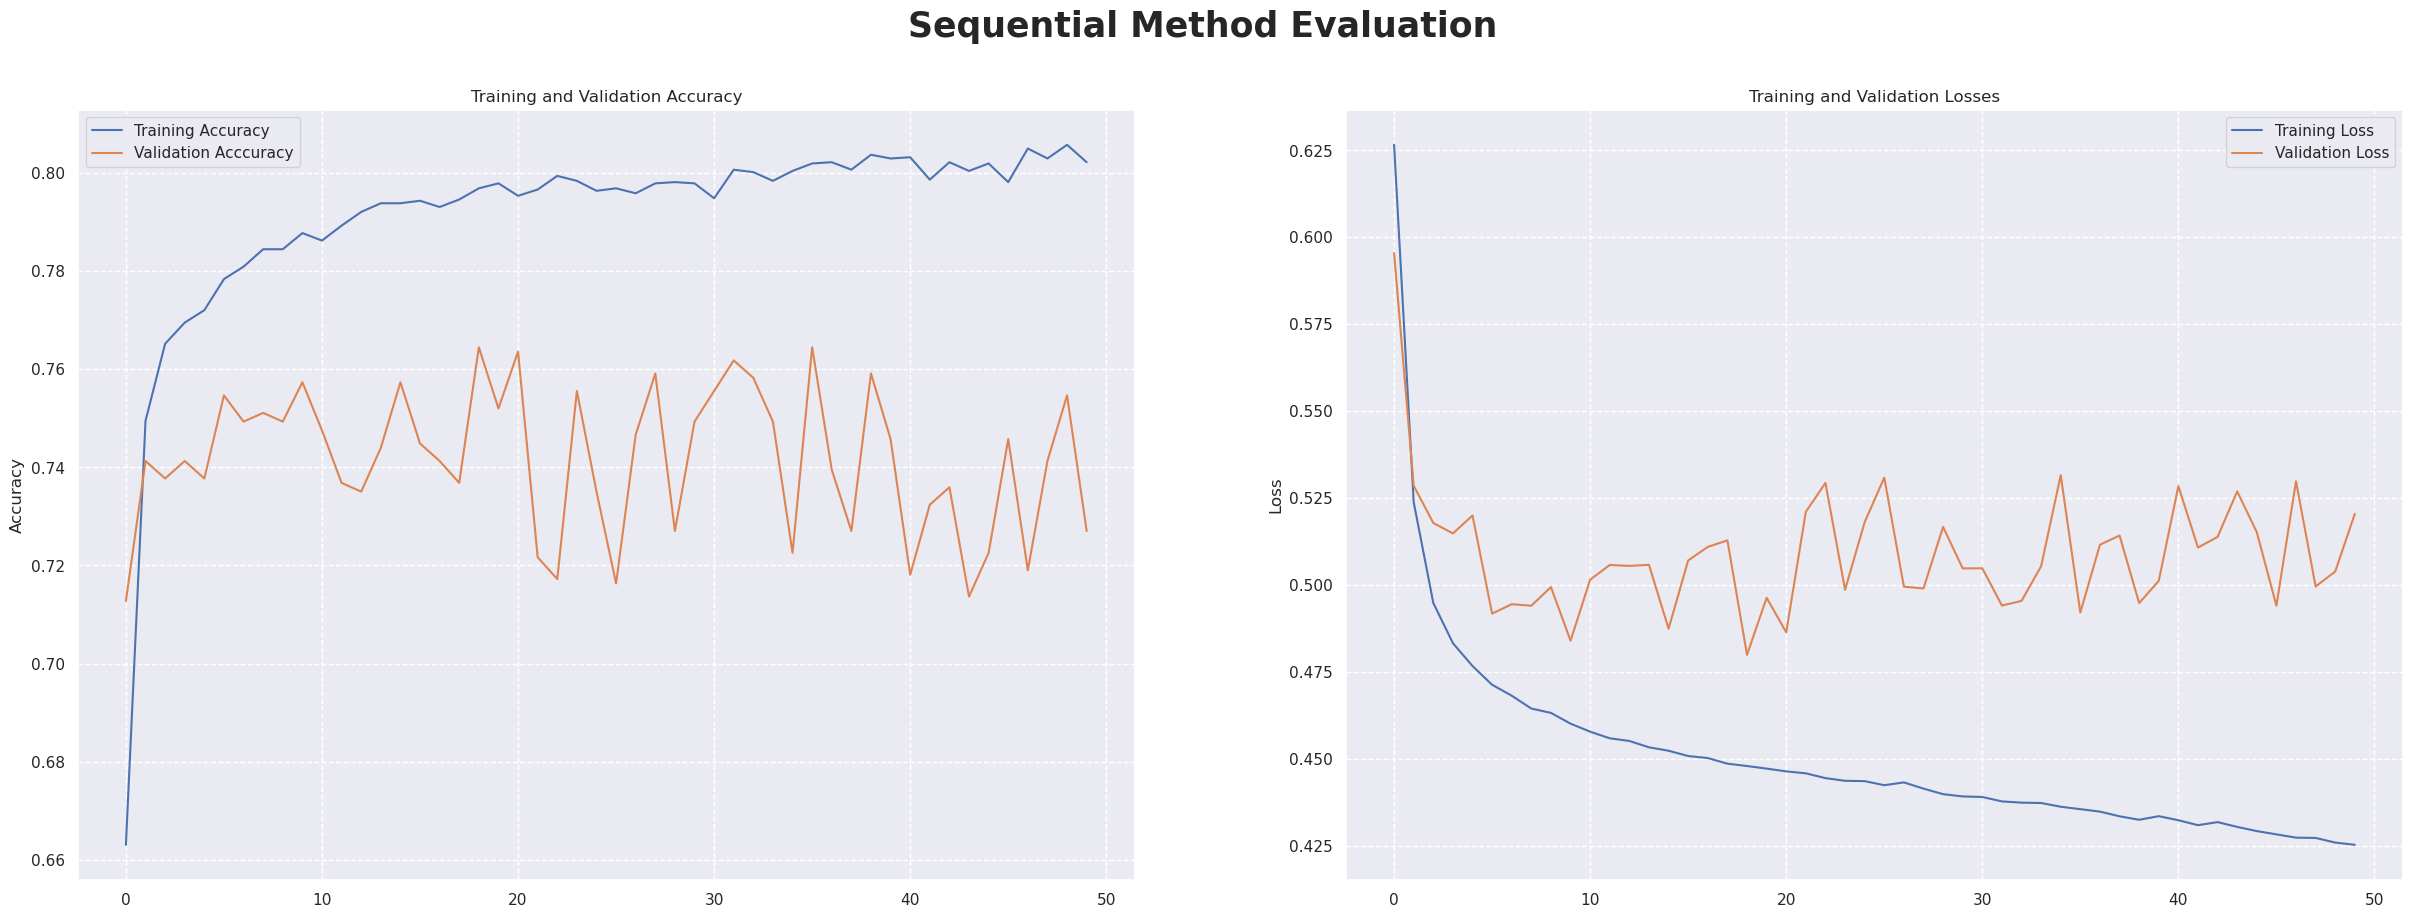

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_1.history['accuracy'],label="Training Accuracy")
plt.plot(history_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_1.history['loss'], label="Training Loss")
plt.plot(history_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

From our graph above we could see that our model has the tendency of `exploding`, so we want to tune our sequential model in our next section:

##### **SEQUENTIAL MODEL IMPROVEMENT**

Here as we explain above we want to improve our model:

In [ ]:
seq_improve = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', kernel_initializer = 'HeNormal', input_shape=(inp,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(out, activation='sigmoid')
])
seq_improve.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

We used the batch normalization and used an dropout neuron in hopes of achieving better performances:

##### **MODEL IMPROVEMENT TRAINING**

In [ ]:
history_2 = seq_improve.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
62/62 [==============================] - 1s 4ms/step - loss: 0.8134 - accuracy: 0.4675 - val_loss: 0.6805 - val_accuracy: 0.6753
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.4762 - val_loss: 0.6256 - val_accuracy: 0.6967
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7371 - accuracy: 0.4899 - val_loss: 0.5955 - val_accuracy: 0.7021
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.5137 - val_loss: 0.5720 - val_accuracy: 0.7101
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5335 - val_loss: 0.5543 - val_accuracy: 0.7217
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.5596 - val_loss: 0.5404 - val_accuracy: 0.7181
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.5791 - val_loss: 0.5300 - val_accuracy: 0.7244
Epoch 8/50
62/62 [==

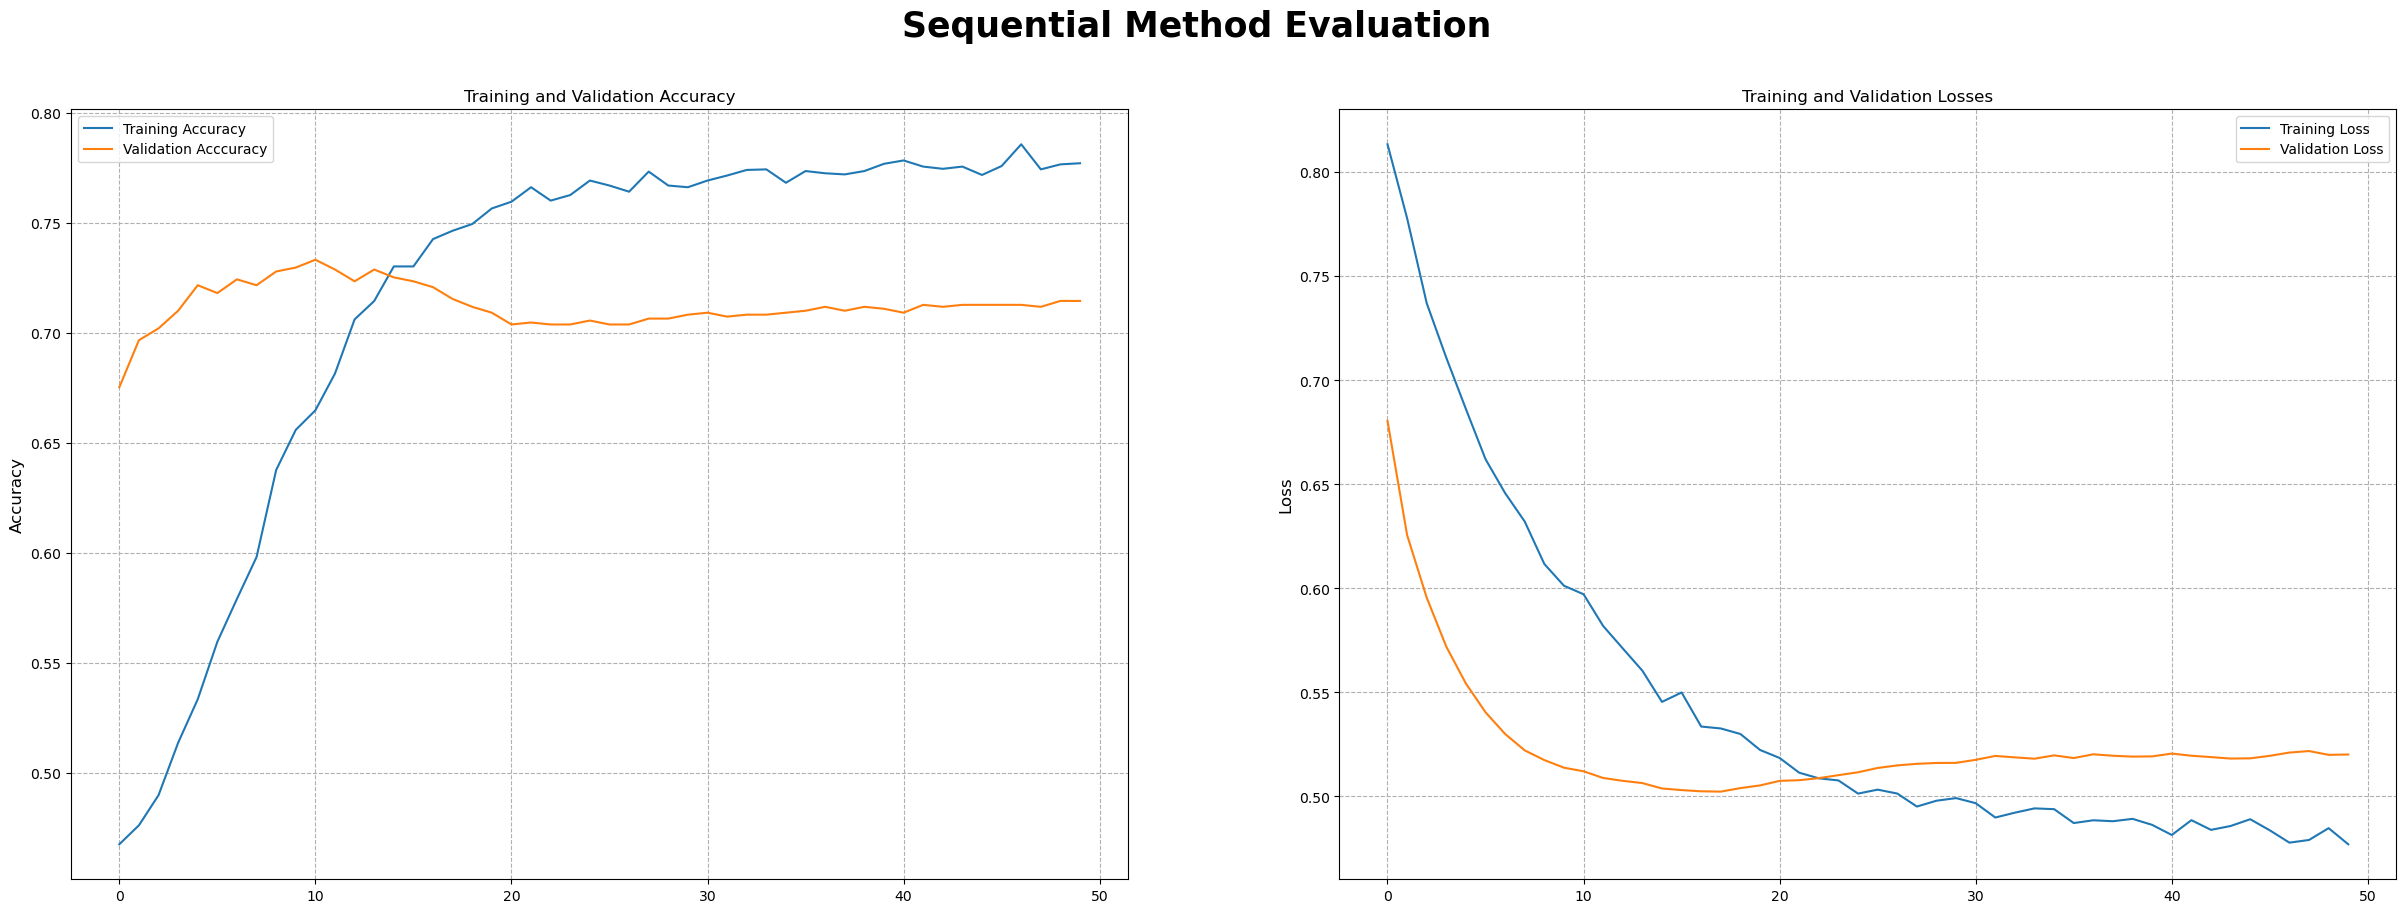

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_2.history['accuracy'],label="Training Accuracy")
plt.plot(history_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_2.history['loss'], label="Training Loss")
plt.plot(history_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

The results show that our model has performed better using the dropout and normalization. We also tuned the learning rate, making it smaller than the default one.

Then we want to freeze our results so it could not be trained again:

In [ ]:
seq_improve.trainable = False

### **FUNCTIONAL MODEL DEFINITION**

Now it's time for us to work on our functional model:

##### **FUNCTIONAL BASE MODEL**

We do the same base model and we want to see the performances:

In [ ]:
#Functional
input_lyr = tf.keras.layers.Input(shape=(x_resampled.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal')(input_lyr)
layers = tf.keras.layers.Dense(hid, kernel_initializer='HeNormal',activation='relu')(layers)
output = tf.keras.layers.Dense(out, kernel_initializer='HeNormal',activation='sigmoid')(layers)

func_model = tf.keras.models.Model(inputs=input_lyr,outputs=output)

In [ ]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_6 (Dense)             (None, 21)                462       
                                                                 
 dense_7 (Dense)             (None, 17)                374       
                                                                 
 dense_8 (Dense)             (None, 1)                 18        
                                                                 
Total params: 854
Trainable params: 854
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.keras.utils.plot_model(func_model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
func_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

##### **FUNCTIONAL BASE MODEL TRAINING**

In [ ]:
history_3 = func_model.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
62/62 [==============================] - 1s 7ms/step - loss: 0.5653 - accuracy: 0.7353 - val_loss: 0.5505 - val_accuracy: 0.7565
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7609 - val_loss: 0.5224 - val_accuracy: 0.7645
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.7688 - val_loss: 0.5128 - val_accuracy: 0.7547
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.7738 - val_loss: 0.5067 - val_accuracy: 0.7574
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7766 - val_loss: 0.5013 - val_accuracy: 0.7618
Epoch 6/50
62/62 [==============================] - 1s 9ms/step - loss: 0.4677 - accuracy: 0.7789 - val_loss: 0.5073 - val_accuracy: 0.7538
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.7850 - val_loss: 0.5100 - val_accuracy: 0.7511
Epoch 8/50
62/62 [==

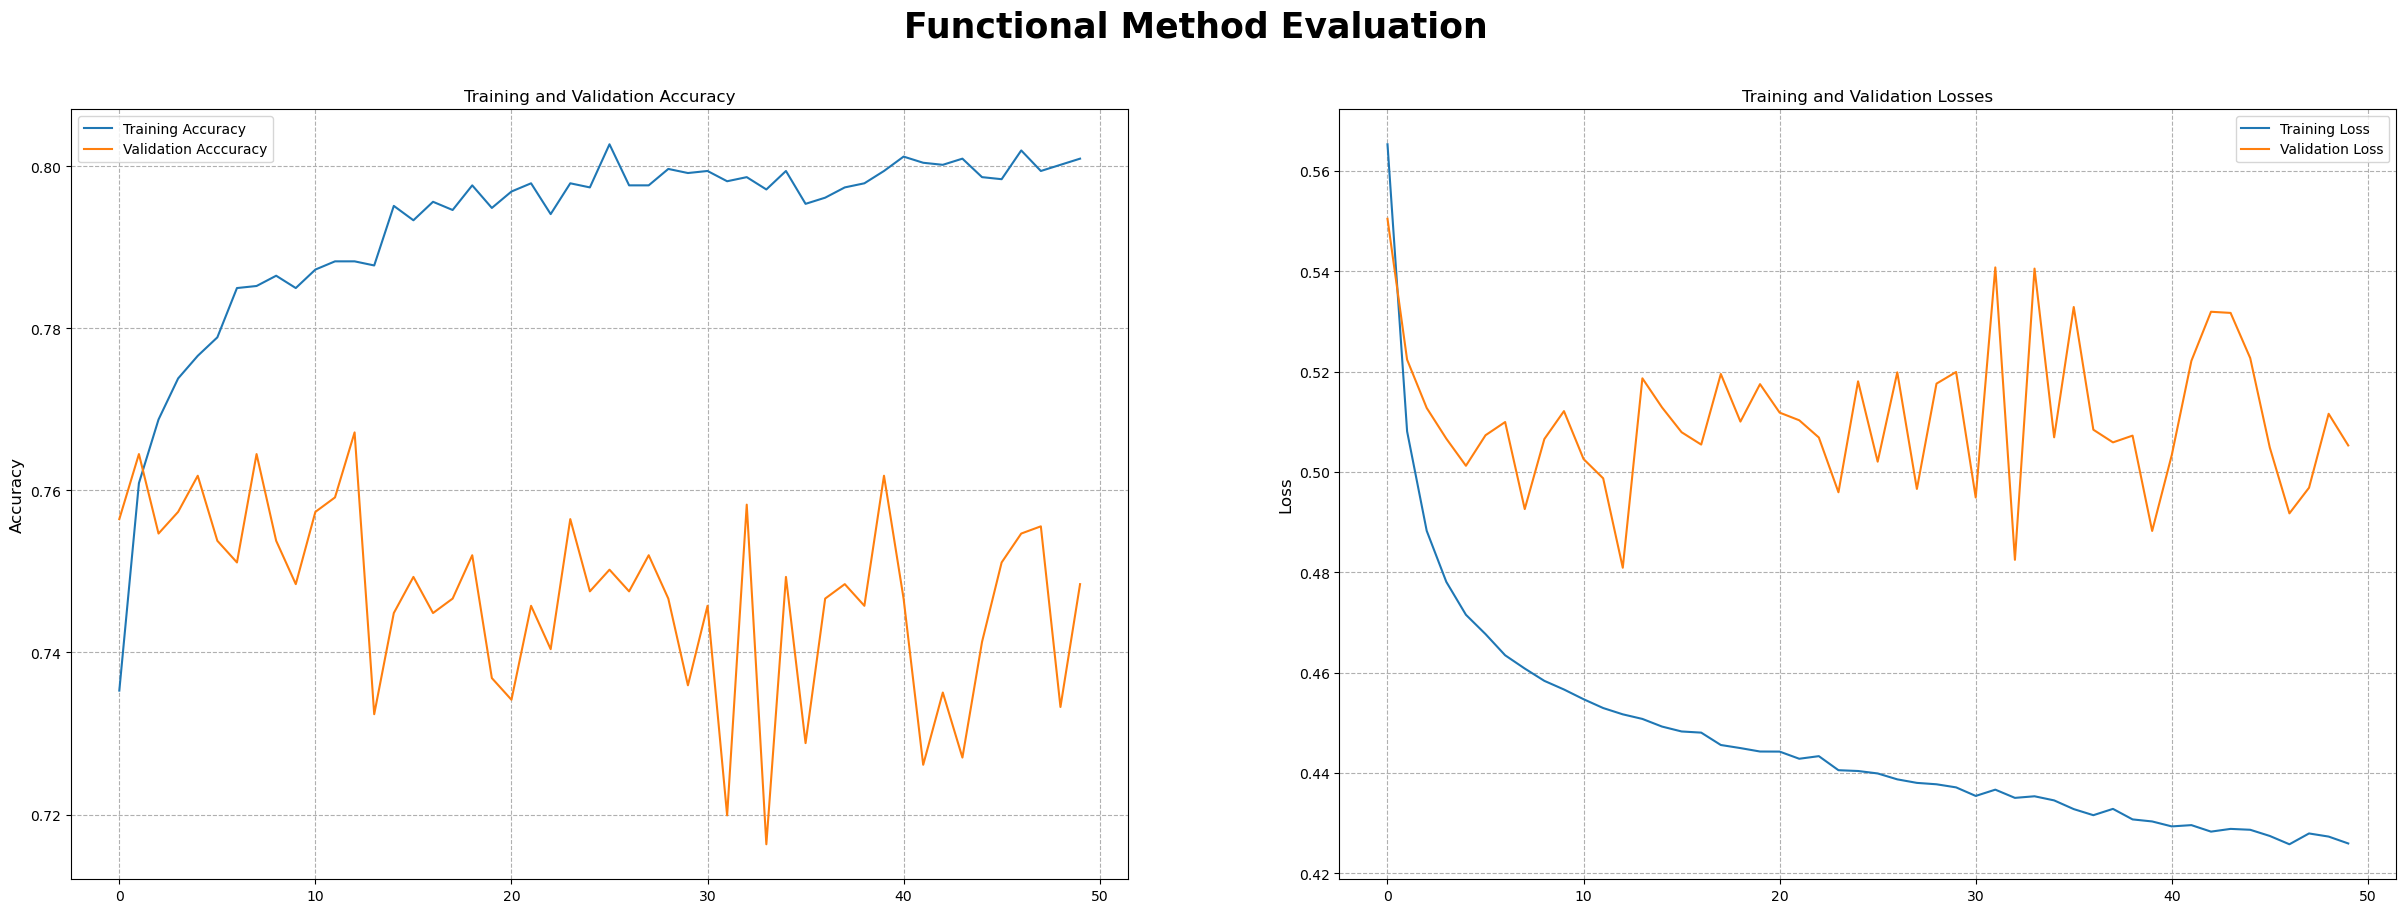

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_3.history['accuracy'],label="Training Accuracy")
plt.plot(history_3.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_3.history['loss'], label="Training Loss")
plt.plot(history_3.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

We also saw the same behaviours in our functional model, here there is an exploding tendency in our model. So we want to tune them further:

##### **FUNCTIONAL MODEL IMPROVEMENT**

Here we want to add some normalization and dropout to our functional model in hopes of getting better performances:

In [ ]:
#Functional
input_lyr = tf.keras.layers.Input(shape=(x_resampled.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, kernel_initializer='HeNormal',activation='sigmoid')(layers)

func_improve = tf.keras.models.Model(inputs=input_lyr,outputs=output)

In [ ]:
tf.keras.utils.plot_model(func_improve, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


We also reduced the learning rate on the optimizers:

In [ ]:
func_improve.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics='accuracy')

In [ ]:
history_4 = func_improve.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
62/62 [==============================] - 1s 6ms/step - loss: 0.9355 - accuracy: 0.4087 - val_loss: 0.7891 - val_accuracy: 0.4326
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.8732 - accuracy: 0.4397 - val_loss: 0.7834 - val_accuracy: 0.4862
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.8139 - accuracy: 0.4853 - val_loss: 0.7632 - val_accuracy: 0.5201
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.5162 - val_loss: 0.7378 - val_accuracy: 0.5504
Epoch 5/50
62/62 [==============================] - 1s 8ms/step - loss: 0.7346 - accuracy: 0.5502 - val_loss: 0.7152 - val_accuracy: 0.5682
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5768 - val_loss: 0.6951 - val_accuracy: 0.5798
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6057 - val_loss: 0.6817 - val_accuracy: 0.5941
Epoch 8/50
62/62 [==

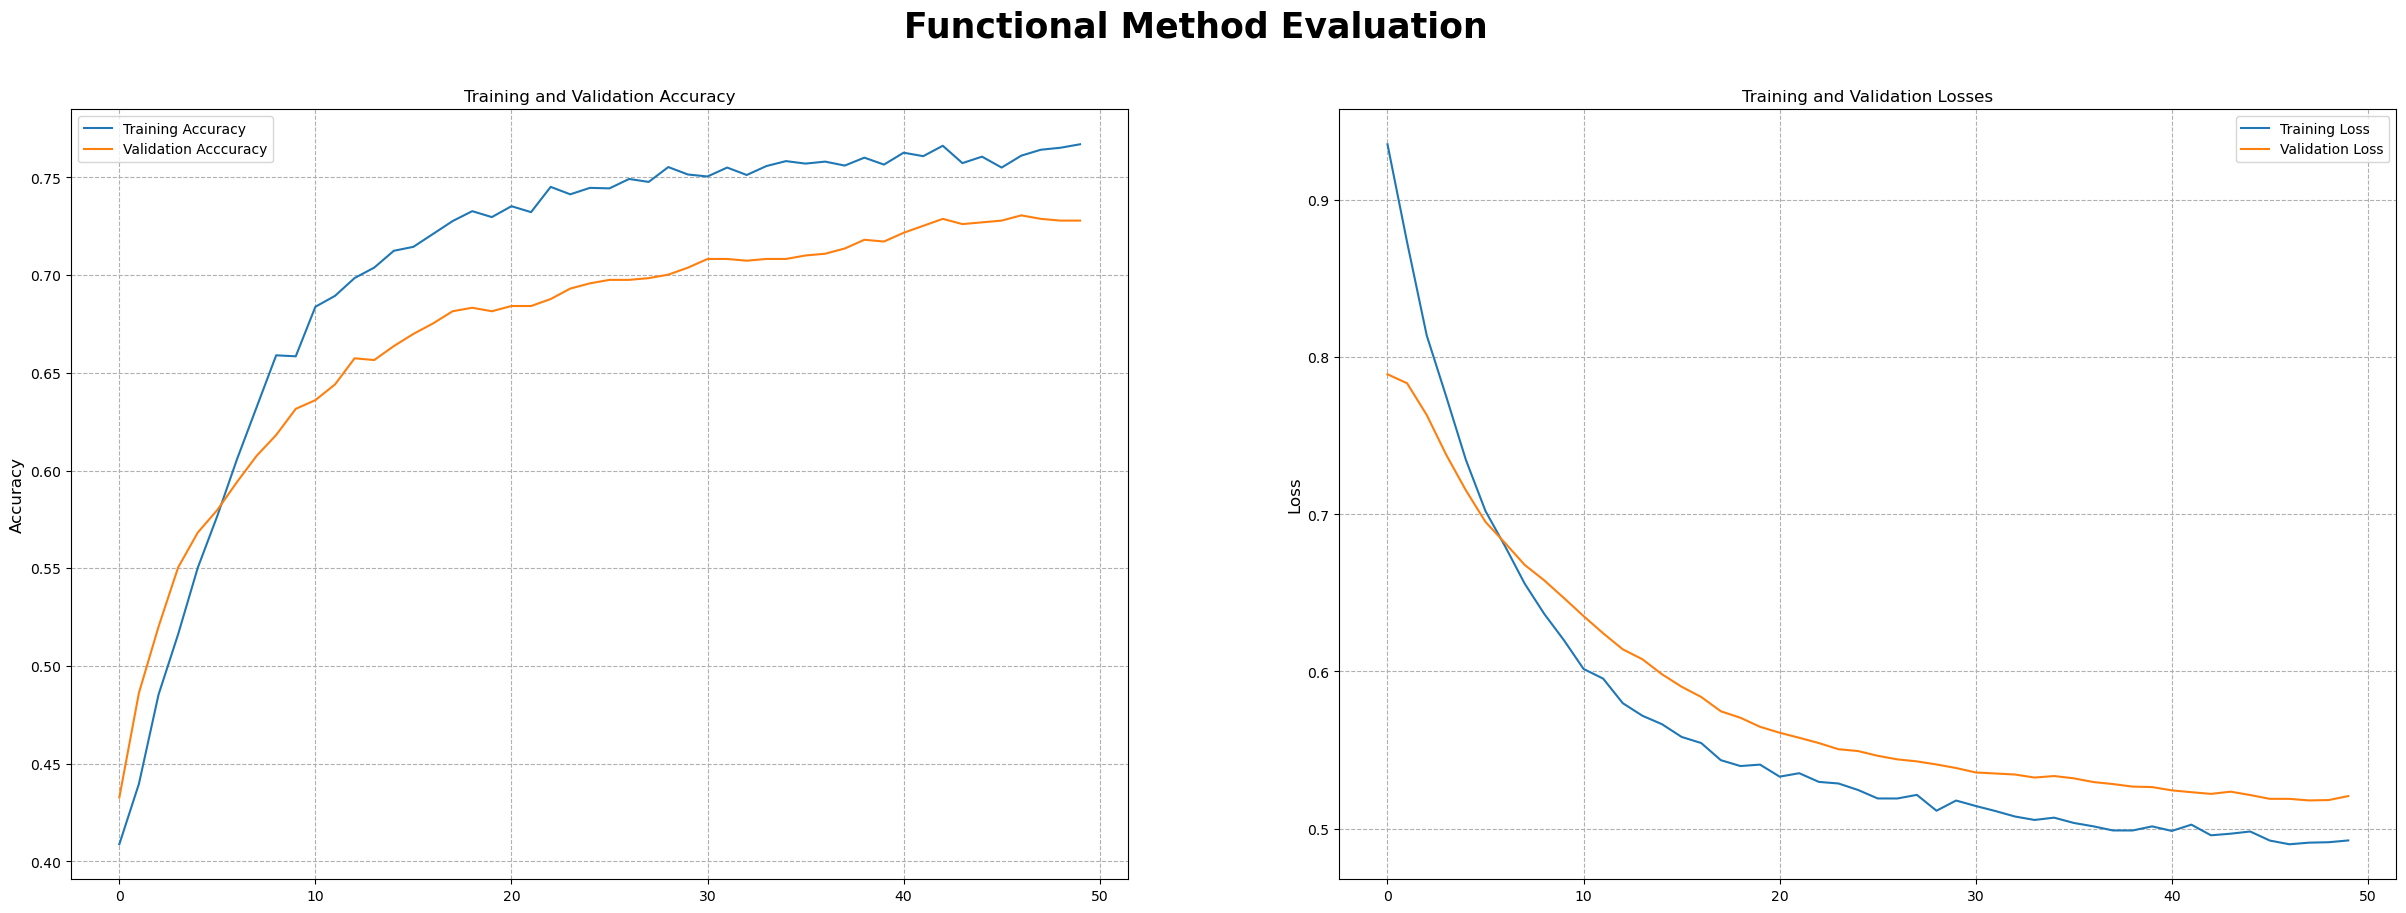

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_4.history['accuracy'],label="Training Accuracy")
plt.plot(history_4.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_4.history['loss'], label="Training Loss")
plt.plot(history_4.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

The results is better too in this functional model, we have a more consistent model in the 10 epochs.

## **MODEL EVALUATION**

### **SEQUENTIAL METHOD**

In [ ]:
# predict probabilities
y_pred_seq = seq_improve.predict(test_dataset)
y_pred_seq = (y_pred_seq > 0.4)

# classification report
target_name = ['No','Yes']
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_seq, zero_division=0, target_names=target_name))

22/22 [==============================] - 0s 3ms/step
========== TEST ==========
              precision    recall  f1-score   support

          No       0.92      0.63      0.74      1030
         Yes       0.45      0.85      0.59       371

    accuracy                           0.68      1401
   macro avg       0.68      0.74      0.67      1401
weighted avg       0.79      0.68      0.70      1401



Here we see that the accuracy is not that good of only 68% in our sequential model.

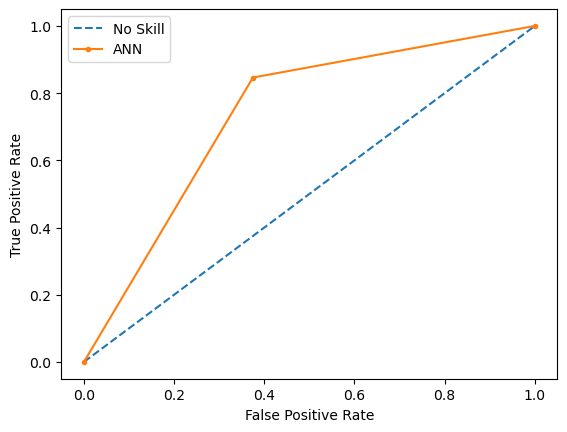

AUC score: 0.7358019522152146


In [ ]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq)
auc = roc_auc_score(y_test,y_pred_seq)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

From the AUC score, we have a decent but not perfect score of 0.735

### **FUNCTIONAL METHOD**

In [ ]:
# predict probabilities
y_pred_func = func_improve.predict(test_dataset)
y_pred_func = (y_pred_func > 0.4)

# classification report
target_name = ['No','Yes']
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0, target_names=target_name))

22/22 [==============================] - 0s 5ms/step
========== TEST ==========
              precision    recall  f1-score   support

          No       0.91      0.67      0.77      1030
         Yes       0.47      0.82      0.60       371

    accuracy                           0.71      1401
   macro avg       0.69      0.75      0.69      1401
weighted avg       0.80      0.71      0.73      1401



We gained better results on the functional model with 71% accuracy when compared to the sequential model of only 68%

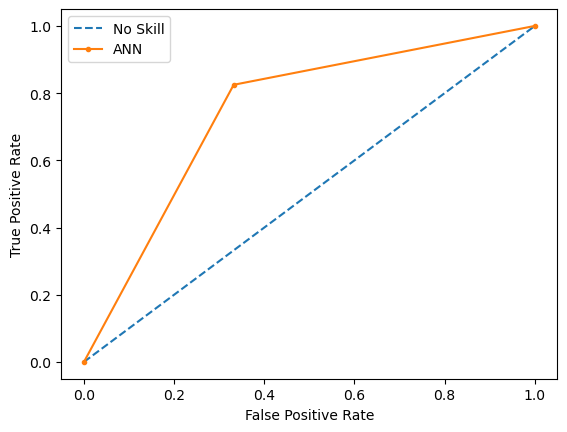

AUC score: 0.7463795043571559


In [ ]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test,y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

From the AUC score too we see better scores than our sequential model of 0.746 meaning the functional tuned model is better than the other 3 models.

## **SAVING MODEL FOR DEPLOYMENTS**

In [ ]:
#Saving our model
pickle.dump(full_pipeline, open('M1P2_pred.pkl','wb'))

func_improve.save('churn_model.h5')

In [ ]:
#Finding our versions for requirements.txt
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.9.1
1.1.2
1.22.3


## **MODEL INFERENCE**

Here we want to test our data inferencing with the data we sampled before:

In [ ]:
inference

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6583,Female,0,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.25,412.55,0.0
5186,Female,1,No,No,24,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,36.45,36.45,1.0
1825,Female,0,No,No,48,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,54.20,1739.60,0.0
4064,Female,0,No,No,24,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,50.15,50.15,0.0
6144,Male,1,Yes,No,24,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.00,2024.10,0.0


here we want to transform our inference data:

In [ ]:
inference_tf = full_pipeline.transform(inference)

The last thing we want to do is we want to predict our inference data by doing some slicing on the inference data

In [ ]:
category = np.round(func_model.predict(np.array([inference_tf[0]]))[0][0])
category

1/1 [==============================] - 0s 162ms/step


0.0

Here we see that we successfully predicted our inference data.

## **CONCLUSIONS BASED ON ANALYSIS**

Actually, in my opinion, churn is a normal occurrence, provided that it occurs at a specific ratio.
Churn above I may suppose due to: 
- customers moving to regions or locations where TELCO services are not reached 
- the customer plans to not use the service for a specific amount of time for some reason, and so forth.
However, if the turnover percentage is high enough (this is relative), it denotes that I am assuming the consumer is dissatisfied with the service received or that it does not meet their preferences or expectations.
- Our data is unbalanced (74%:26%), according to the findings of our data exploration. But we handled and balance the datas
- Additionally, we was successful in developing the Functional API Method and Sequential API Method, two deep learning models. The best model is the tuned functional model.
- Based from the accuracy, it is decent (71%) but can be due to our balancing and lack of data.